In [ ]:
#This program use an artificial neural network called LTSM
#to predict the closing stock price of Apple Inc
#using the past 60 day stock price

import math
import pandas_datareader as web
from pandas.util.testing import assert_frame_equal as web1
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#get the the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,269.399658
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.086151
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,273.757477


In [ ]:
#get the number of rows and columns in the data set
df.shape

(2003, 6)

Text(0, 0.5, 'Close Price USD ($)')

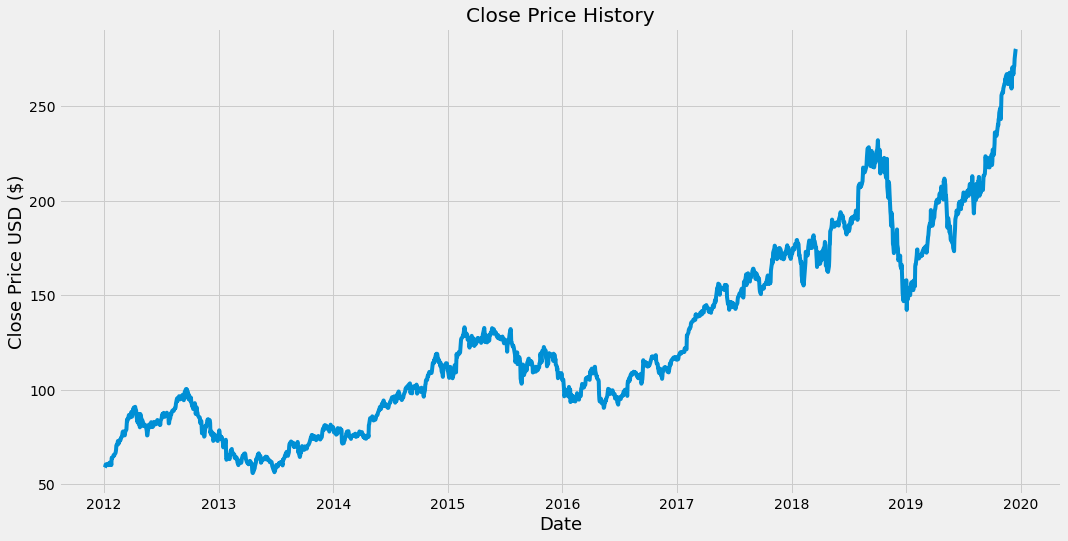

In [ ]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [ ]:
#Create a new data frame with the close column only
data = df.filter(['Close'])
#Convert the data frame to a numpy array
dataset = data.values
#Get the number of rows to train model on
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

1603

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
#Create the training dataset
#create the scaled training dataset
train_data =scaled_data[0:training_data_len,:]
#Split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [ ]:
#build the ltsm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#Compile the model
model.compile(optimizer='adam', loss= 'mean_squared_error')


In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1543/1543 [==============================] - 60s 39ms/step - loss: 7.8777e-04


In [ ]:
#Create the testing dataset
#Create new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Get the root mean squared error (RSME)
rmse = np.sqrt( np.mean((predictions- y_test)**2 ))
rmse

6.52286492873576

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


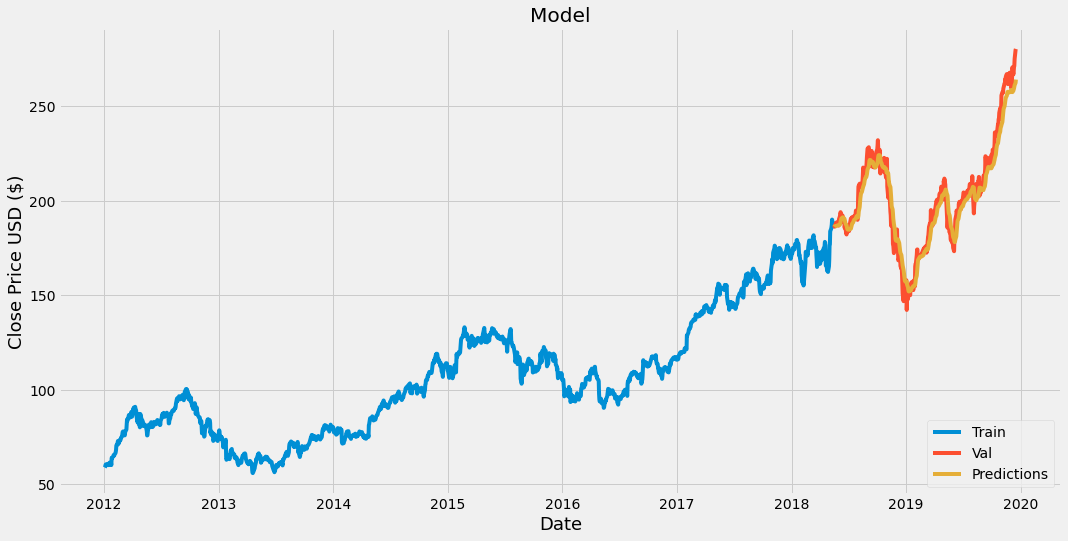

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,186.255798
2018-05-18,186.309998,186.492905
2018-05-21,187.630005,186.491058
2018-05-22,187.160004,186.533783
2018-05-23,188.360001,186.537827
...,...,...
2019-12-11,270.769989,259.520905
2019-12-12,271.459991,260.354950
2019-12-13,275.149994,261.240173


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new data frame
new_df = apple_quote.filter(['Close'])
#Get the last 60 days of prices and convert the dataframe to array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 60
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[265.9822]]


In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    279.73999
Name: Close, dtype: float64


In [ ]:
# get the sharpe ratio for the stock
# get the daily return

# get the daily return
daily_return = df['Close'].pct_change()
# calculate the annualized sharpe ratio
sharpe_ratio = daily_return.mean() / daily_return.std()
print(sharpe_ratio)

# get the stock volatility
stock_volatility = daily_return.std()
print(stock_volatility)

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('daily_returns_adjusted_date.csv')




In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import torch

# Load FinBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = AutoModelForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    probs = softmax(outputs.logits, dim=1)
    sentiment = torch.argmax(probs, dim=1).numpy()[0]  # 0: negative, 1: neutral, 2: positive
    return sentiment

# Apply sentiment analysis
data['predicted_sentiment'] = data['text'].apply(get_sentiment)


In [ ]:
# use MA for the sentiment analysis when there is no sentiment, 5 day MA

In [ ]:
trading_decisions = {}

for date, group in data.groupby('date/time'):
    sorted_stocks = group.sort_values(by='predicted_sentiment', ascending=False)
    top_20 = sorted_stocks.head(20)['stock_symbol'].tolist()  # Assuming there's a 'stock_symbol' column
    bottom_20 = sorted_stocks.tail(20)['stock_symbol'].tolist()
    trading_decisions[date] = {'long': top_20, 'short': bottom_20}

# Now, trading_decisions contains the trading strategy for each date


In [ ]:
import numpy as np

# Sample daily returns of the portfolio (in decimal form)
daily_returns = np.array([0.01, -0.02, 0.015, -0.005, 0.01])

# Calculate Annualized Return
annualized_return = np.prod(1 + daily_returns)**(252/len(daily_returns)) - 1

# Calculate Volatility (Standard Deviation of daily returns)
volatility = np.std(daily_returns) * np.sqrt(252)

# Assuming a risk-free rate of 1% (0.01 in decimal form)
risk_free_rate = 0.01

# Calculate Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / volatility

annualized_return, volatility, sharpe_ratio